# Portfolio Complex Systems Module 2 Temporal signatures

Name: Femian Dooms

Student number: 2086229

Data: Timeseries data featuring power imbalance prices in the Netherlands. Obtained from Tennet transparency (publicaly available).
2927 data points measured from 01-01-2024 up untill 01-04-2024. Every datapoint is the mean price at time i where i is measured in days.

Sources used: http://www.w3.org/1998/Math/MathML

In [1]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt



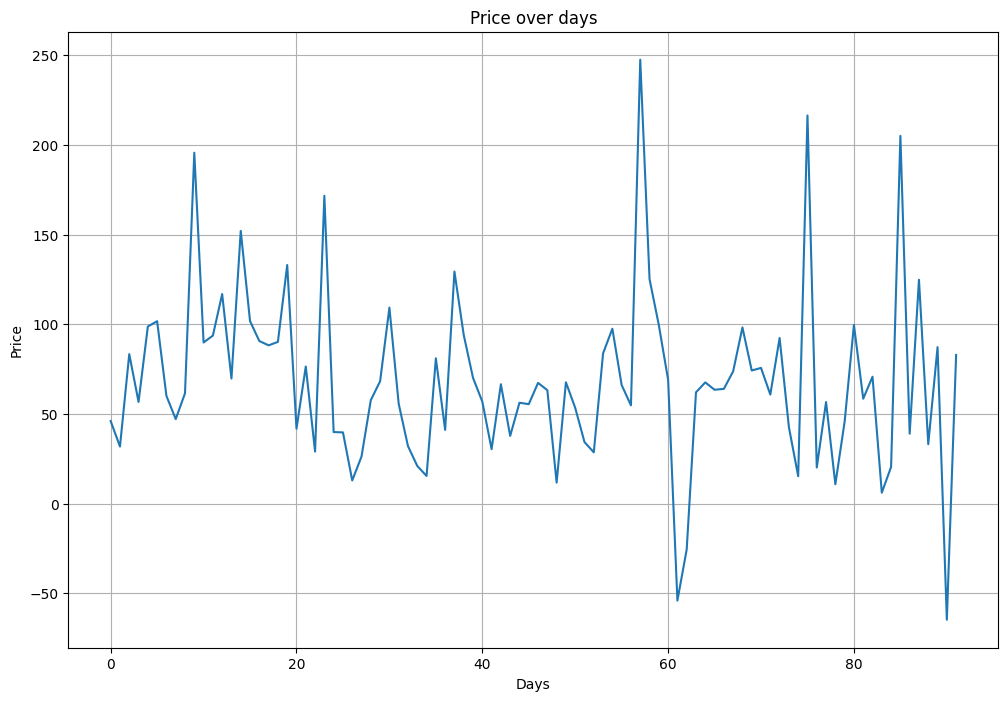

In [30]:
# Create df 
df = pd.read_csv('final_dataset.csv', delimiter=',')

# Group by date and calculate the mean of the imbalance price
df = df.groupby('Date')['imbalance_price'].mean().reset_index()
# Imbalance prices over time - We will use throughout the E-portofolio. 
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['imbalance_price'], linestyle='-')

plt.title('Price over days')
plt.xlabel('Days')
plt.ylabel('Price')

# Show the plot
plt.grid(True)
plt.show()

## Temporal Signatures and how to analyze using order changes

temporal signature captures underlying patterns and behaviors that occur over time in time series data. Temporal signatures are categorized into first, second, and third orders. 

First-order temporal signatures capture the most basic and immediate temporal patterns within the data. They focus on single, direct observations over time without considering the interactions or dependencies between different time points. A common practise is to use the first order difference (lag difference); If Yt denotes the value of the time series Y at period t, then the first difference of Y at period t is equal to Yt-Yt-1. With this we can stabilize the mean of the time series by eliminating changes in its level and reducing trend and seasonality.

Second-order temporal signatures delve deeper into the relationships and dependencies between different time points. They capture periodic behavior by eliminating removing trends in the rate of change. <math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msup><mi mathvariant="normal">Δ</mi><mn>2</mn></msup><msub><mi>Y</mi><mi>t</mi></msub><mo>=</mo><mi mathvariant="normal">Δ</mi><mo stretchy="false">(</mo><mi mathvariant="normal">Δ</mi><msub><mi>Y</mi><mi>t</mi></msub><mo stretchy="false">)</mo><mo>=</mo><msub><mi>Y</mi><mi>t</mi></msub><mo>−</mo><mn>2</mn><msub><mi>Y</mi><mrow><mi>t</mi><mo>−</mo><mn>1</mn></mrow></msub><mo>+</mo><msub><mi>Y</mi><mrow><mi>t</mi><mo>−</mo><mn>2</mn></mrow></msub></mrow><annotation encoding="application/x-tex">\Delta^2 Y_t = \Delta(\Delta Y_t) = Y_t - 2Y_{t-1} + Y_{t-2}
</annotation></semantics></math> 

If (\Delta^2 Y_t) is positive, the time series is bending upward at time i.
Conversely, if (\Delta^2 Y_t) is negative, the time series is bending downward at time i.

Third-order temporal signatures extend the analysis to even more complex patterns by considering interactions among triples of observations. These signatures capture higher-order dependencies and nonlinear relationships that first- and second-order signatures might miss. The Lorenz system exhibits this kind of behavior. 


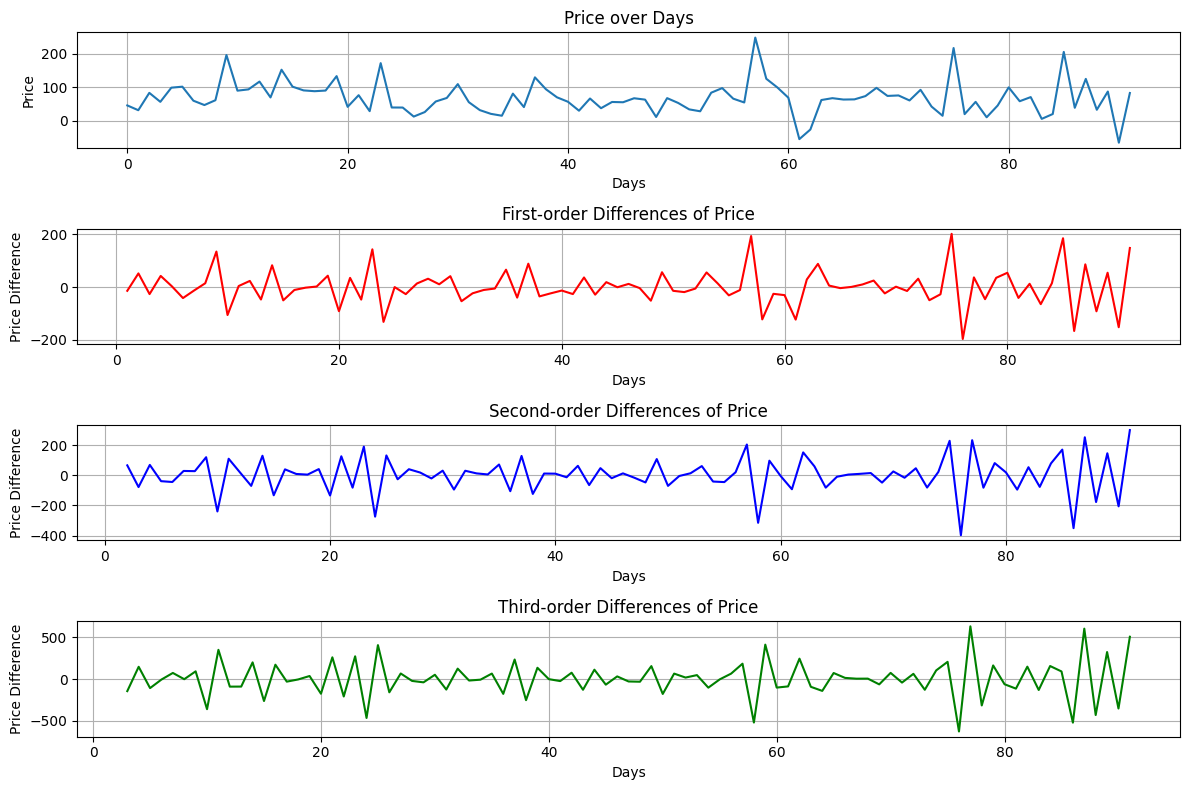

In [33]:
# Creating diff in price
# Calculate first-order differences
df['price_diff'] = df['imbalance_price'].diff()
df['price_diff_second'] = df['price_diff'].diff()
df['price_diff_third'] = df['price_diff_second'].diff()
# Drop the first row as it will have NaN value due to differencing

# Plotting
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(df.index, df['imbalance_price'], linestyle='-')
plt.title('Price over Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)

# First-order Differences
plt.subplot(4, 1, 2)
plt.plot(df.index, df['price_diff'], linestyle='-', color='r')
plt.title('First-order Differences of Price')
plt.xlabel('Days')
plt.ylabel('Price Difference')
plt.grid(True)

# Second-order Differences
plt.subplot(4, 1, 3)
plt.plot(df.index, df['price_diff_second'], linestyle='-', color='b')
plt.title('Second-order Differences of Price')
plt.xlabel('Days')
plt.ylabel('Price Difference')
plt.grid(True)

# Third-order Differences
plt.subplot(4, 1, 4)
plt.plot(df.index, df['price_diff_third'], linestyle='-', color='g')
plt.title('Third-order Differences of Price')
plt.xlabel('Days')
plt.ylabel('Price Difference')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


Looking at the graphs above we can conclude a few things about our dataset:
Original Time Series (Price over Days)
The first plot shows the original time series data for price over days. It indicates how the price fluctuates over time.

General trend: The prices show variability with several peaks and troughs. In addtion, looking at the pattern we can that there are some noticeable spikes and drops which suggest periods of high volatility.

First-order Differences (First-order Changes)
The second plot shows the first-order differences of the price, which represent the change in price from one day to the next.
Variability: The first-order differences fluctuate around zero, indicating that there is no consistent upward or downward trend in the daily changes.
Volatility: Periods with larger spikes in the differences indicate days with significant price changes, both positive and negative. This reflects the volatility of the price.

Second-order Differences (Second-order Changes)
The third plot shows the second-order differences, which represent the changes in the first-order differences (i.e., the acceleration or deceleration of price changes).
Volatility of Changes: These differences highlight periods where the rate of price change itself is changing. Larger values indicate more rapid changes in price volatility.
Stability: When the second-order differences are near zero, it suggests periods of relative stability where the daily price changes are more consistent.

Third-order Differences (Third-order Changes/Chaos)
The fourth plot shows the third-order differences, representing the changes in the second-order differences (i.e., the rate of change of the acceleration of price changes).
High-order Variability: The third-order differences indicate how erratic or chaotic the changes in the second-order differences are. Large fluctuations in this plot suggest highly unpredictable and erratic changes in price acceleration.
Chaos: The presence of significant spikes in this plot indicates periods of chaos where the price movements are not only volatile but also rapidly changing in an unpredictable manner.

With this we can conclude that the average price sees no upward or downward trend in daily changes. In addition it is clear that the dataset contains high third order variability meaning that there is some eradic volatility that is hard to forecast without including other variables. 

## Variability in timeseries data

Key concepts that can cause variability in timeseries data:
Measurement error - This refers to the discrepancy between the observed value and the true value of a data point.At any point in time, the precision of the real value is lowered. 
Random walk - Drift in the system based on distribution, but ‘real-value’ is not changing. This causes intrinsic fluctuations of variability or randomness in the system.
Perturbations - With some stability in the system, influences on the system will not affect it much and it remains around it’s ‘real-value of change'

In order to differentiate we can show the different variability by adding Measurement error, random walk and perturbations to our data and visually inspect each component. 

What effect does up- and down-sampling have on the temporal signature? 


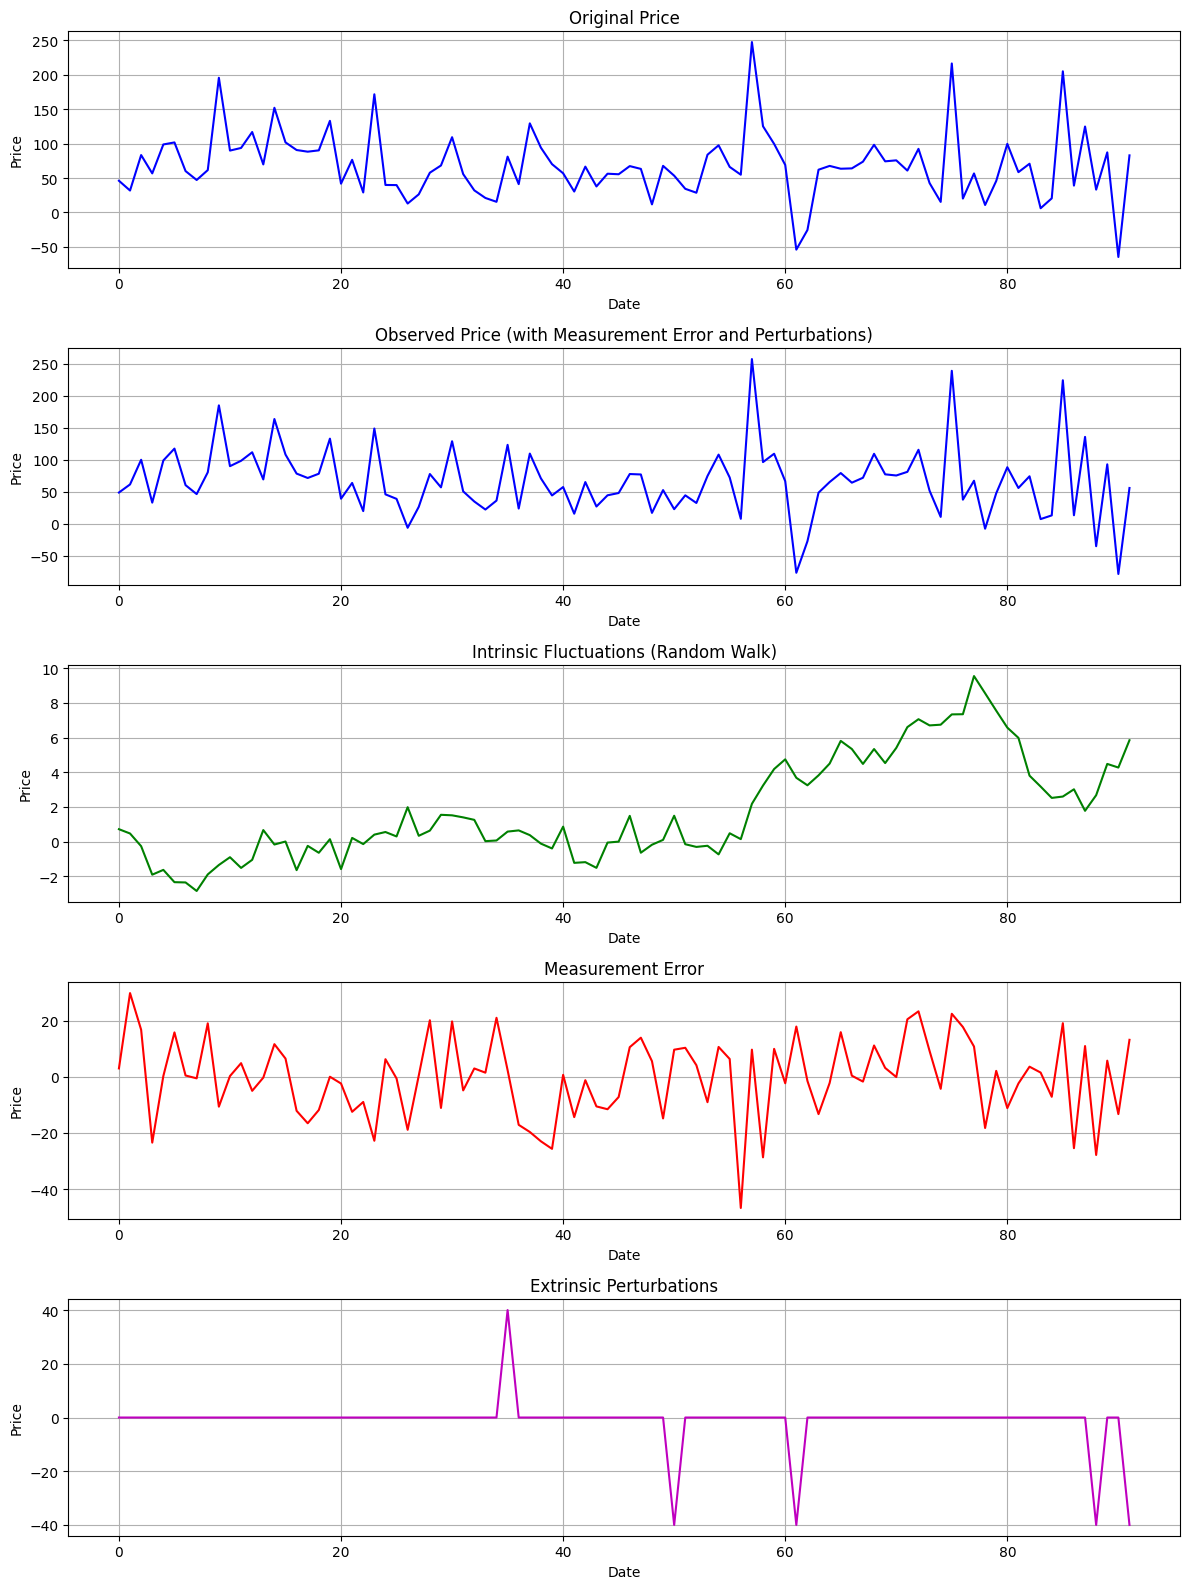

In [51]:
# Generate intrinsic fluctuations (random walk)
intrinsic_fluctuations = np.cumsum(np.random.randn(len(df)))

# Generate measurement error (small random noise)
measurement_error = np.random.normal(0, 15, size=len(df))

# Generate extrinsic perturbations (large random shocks)
extrinsic_perturbations = np.zeros(len(df))
shock_indices = np.random.choice(len(df), 5, replace=False)
extrinsic_perturbations[shock_indices] = np.random.choice([40, -40], size=5)

# Add the generated components to the dataframe
df['intrinsic_fluctuations'] = intrinsic_fluctuations
df['measurement_error'] = measurement_error
df['extrinsic_perturbations'] = extrinsic_perturbations

# Calculate the observed price
df['observed_price'] = df['imbalance_price'] + measurement_error + extrinsic_perturbations

# Plotting
plt.figure(figsize=(12, 16))

# Original Price
plt.subplot(5, 1, 1)
plt.plot(df.index, df['imbalance_price'], linestyle='-', color='b')
plt.title('Original Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Observed Price
plt.subplot(5, 1, 2)
plt.plot(df.index, df['observed_price'], linestyle='-', color='b')
plt.title('Observed Price (with Measurement Error and Perturbations)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Intrinsic Fluctuations (Random Walk)
plt.subplot(5, 1, 3)
plt.plot(df.index, df['intrinsic_fluctuations'], linestyle='-', color='g')
plt.title('Intrinsic Fluctuations (Random Walk)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Measurement Error
plt.subplot(5, 1, 4)
plt.plot(df.index, df['measurement_error'], linestyle='-', color='r')
plt.title('Measurement Error')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Extrinsic Perturbations
plt.subplot(5, 1, 5)
plt.plot(df.index, df['extrinsic_perturbations'], linestyle='-', color='m')
plt.title('Extrinsic Perturbations')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [52]:
# Calculate variance
print(f"Variance of Intrinsic Fluctuations: {np.var(df['intrinsic_fluctuations'])}")
print(f"Variance of Measurement Error: {np.var(df['measurement_error'])}")
print(f"Variance of Extrinsic Perturbations: {np.var(df['extrinsic_perturbations'])}")



Variance of Intrinsic Fluctuations: 8.389159515392992
Variance of Measurement Error: 196.72577381837237
Variance of Extrinsic Perturbations: 85.25519848771268


### Differentiate fluctuations
In the graphs above we can see the difference measurement error, intrinstic and extrinsic fluctuation has on the our timeseries data.  

(1) due to intrinsic flactuation (random walk) we see that the observed prices are a bit higher than the 'real prices' are. The random walk has higher values at later timepoints in the dataset, this is noticable in the observer price graph.

(2) The measurement error persists throughout the data points, but the overall the patterns and trend stays roughly the same.

(3) Extrinsic fluctuations (shocks) creates some extra volatility in the dataset by increasing only some certain data points. 

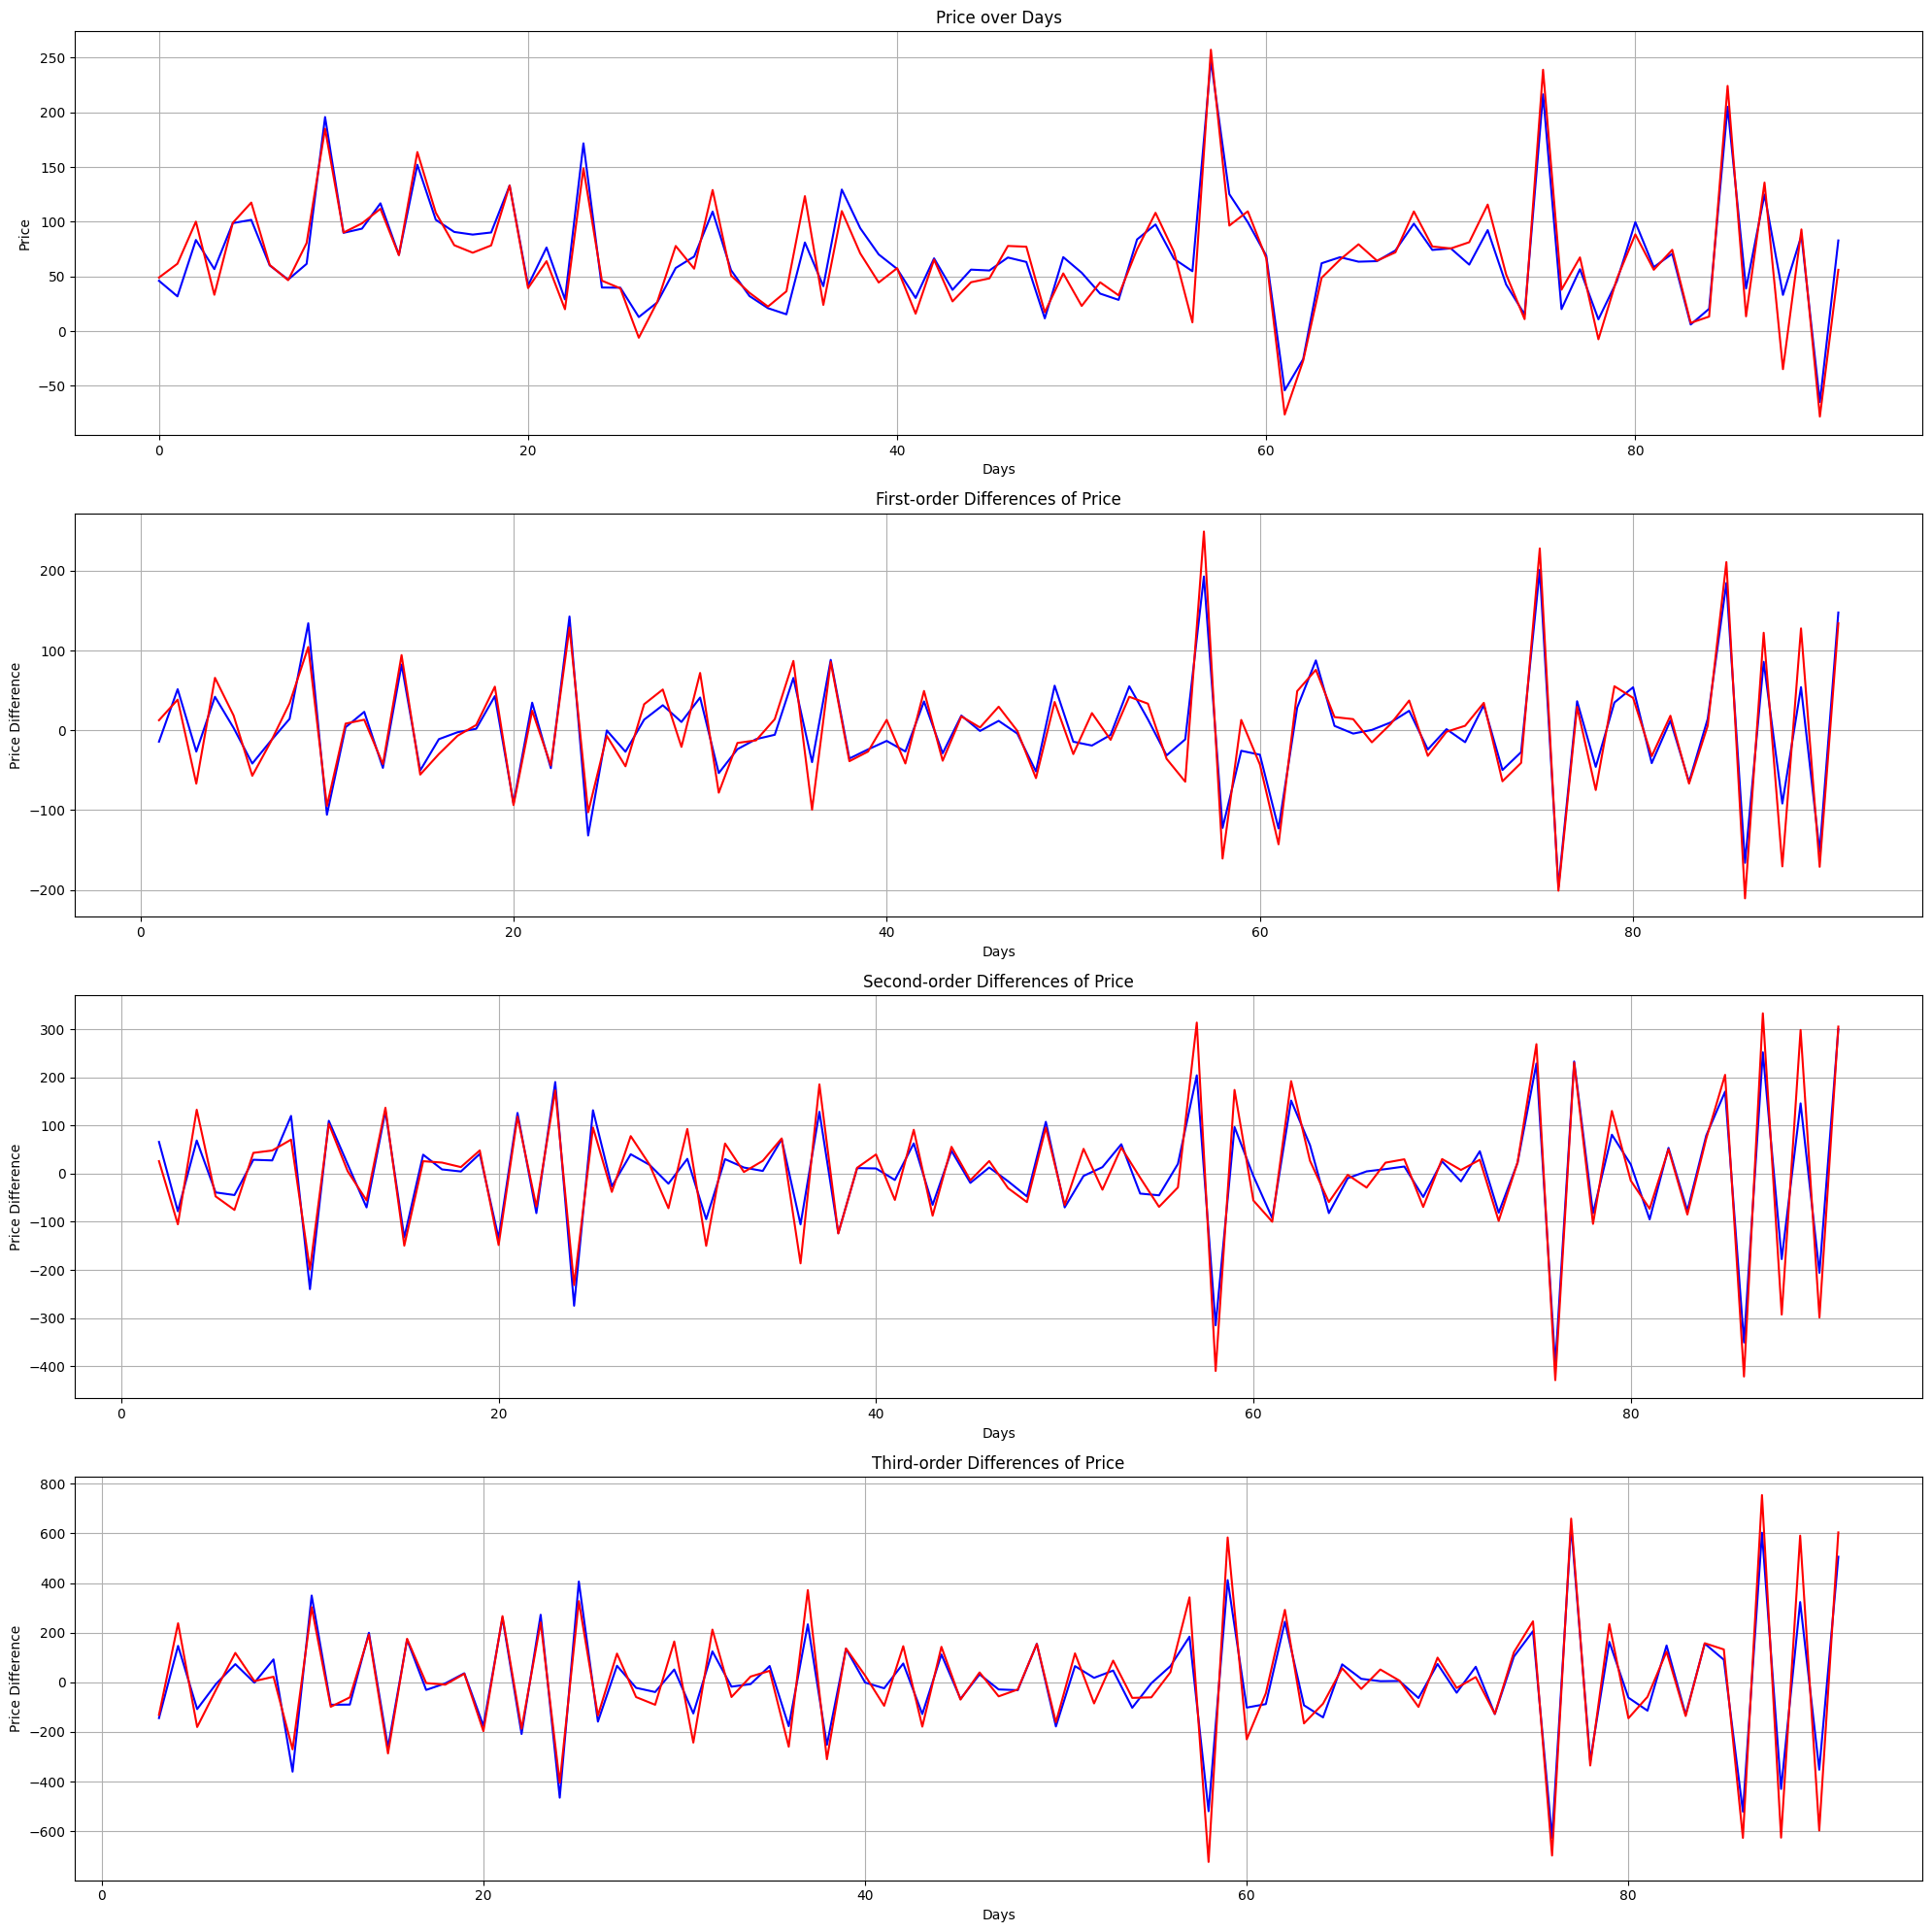

In [54]:
df['price_diff_variability'] = df['observed_price'].diff()
df['price_diff_second_variability'] = df['price_diff_variability'].diff()
df['price_diff_third_variability'] = df['price_diff_second_variability'].diff()

# Plotting
plt.figure(figsize=(20, 20))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(df.index, df['imbalance_price'], linestyle='-', color='b')
plt.plot(df.index, df['observed_price'], linestyle='-', color='r')
plt.title('Price over Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)

# First-order Differences
plt.subplot(4, 1, 2)
plt.plot(df.index, df['price_diff'], linestyle='-', color='b')
plt.plot(df.index, df['price_diff_variability'], linestyle='-', color='r')
plt.title('First-order Differences of Price')
plt.xlabel('Days')
plt.ylabel('Price Difference')
plt.grid(True)

# Second-order Differences
plt.subplot(4, 1, 3)
plt.plot(df.index, df['price_diff_second'], linestyle='-', color='b')
plt.plot(df.index, df['price_diff_second_variability'], linestyle='-', color='r')
plt.title('Second-order Differences of Price')
plt.xlabel('Days')
plt.ylabel('Price Difference')
plt.grid(True)

# Third-order Differences
plt.subplot(4, 1, 4)
plt.plot(df.index, df['price_diff_third'], linestyle='-', color='b')
plt.plot(df.index, df['price_diff_third_variability'], linestyle='-', color='r')
plt.title('Third-order Differences of Price')
plt.xlabel('Days')
plt.ylabel('Price Difference')
plt.grid(True)


# Show plot
plt.tight_layout()
plt.show()

### Effect fluctuations on order changes
In the graphs above we can see the first, second and third order change between the normal data set (blue) and the dataset containing extra variability due to measurement error, intrinsic and extrinsic fluctuations. The effect is mostly seen in the third order change, a lot more chaos has been added to the dataset. The biggest increase is seen at data points where random walk is more prominent in combination with extrinsic fluctuations.     